In [10]:
## Baltic Dry Index (BDI) versus SP500 Lagged Changes -- Lag Theory Analysis
# Zeccca Lehn 9/8/2016
# MIT Open Source License

In [44]:
library(Quandl)
library(zoo)
library(quantmod)
 
# Params:
lagDays <- 125
# https://www.quandl.com/data/LLOYDS
# CODES: "LLOYDS/BDI" Baltic Dry Index is a measure of the price of shipping major raw materials such as metals, grains, and fossil fuels by sea. It is created by the London Baltic Exchange based on daily assessments from a panel of shipbrokers. The BDI is a composite of 3 sub-indices, each covering a different carrier size: Capesize, Panamax, and Supramax. Capesize carriers are the largest ships with a capacity greater than 150,000 DWT. Panamax refers to the maximum size allowed for ships travelling through the Panama Canal, typically 65,000 - 80,000 DWT. The Supramax Index covers carriers with a capacity of 50,000 - 60,000 DWT.
# "LLOYDS/BSI"  Baltic Supramax Index is one of the sub-indices used in constructing the Baltic Dry Index, which is an indicator of the cost associated with shipping raw materials such as metals, grains, and fossil fuels. The Supramax Index only includes carriers with a capacity of 50,000 - 60,000 DWT.
# "LLOYDS/BPI" The Panamax Index is one of the sub-indices used in constructing the Baltic Dry Index, which is an indicator of the cost associated with shipping raw materials such as metals, grains, and fossil fuels. The Panamax Index only includes vessels whose size is less than the maximum size allowed for travelling through the Panama Canal, typically 65,000 - 80,000 DWT. 
# "LLOYDS/BCI" The Capesize Index is one of the sub-indices used in constructing the Baltic Dry Index, which is an indicator of the cost associated with shipping raw materials such as metals, grains, and fossil fuels. The Capesize Index only includes carriers with a capacity greater than 150,000 DWT.
lloydsCode <- "LLOYDS/BDI"

apiKEY <- "YourKeyString" # From free Quandl Account


[1] "SPY"

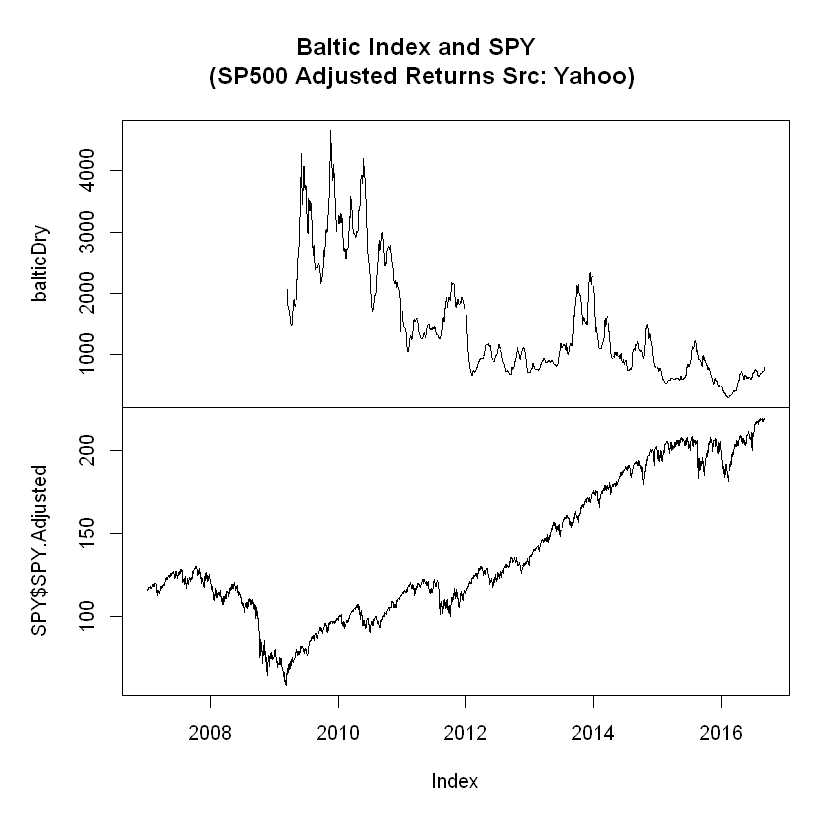

In [45]:
Quandl.api_key(apiKEY)

# Frieght Costs Baltic Index
balticDry <- Quandl(lloydsCode, type = "zoo")
# str(balticDry)
# plot(balticDry)

# SP500 Index
getSymbols("SPY")
SPY <- as.zoo(SPY)
# plot(SPY)

# Merge both time series
data <- merge(balticDry, SPY$SPY.Adjusted)
plot(data, main = "Baltic Index and SPY \n (SP500 Adjusted Returns Src: Yahoo)")
names(data) <- c("balticDry","SPY_Adj")
data <- 100*(diff(data, lag = lagDays)/lag(data, -lagDays))
data <- data[complete.cases(data),]
# plot(data)

options(warn=-1)

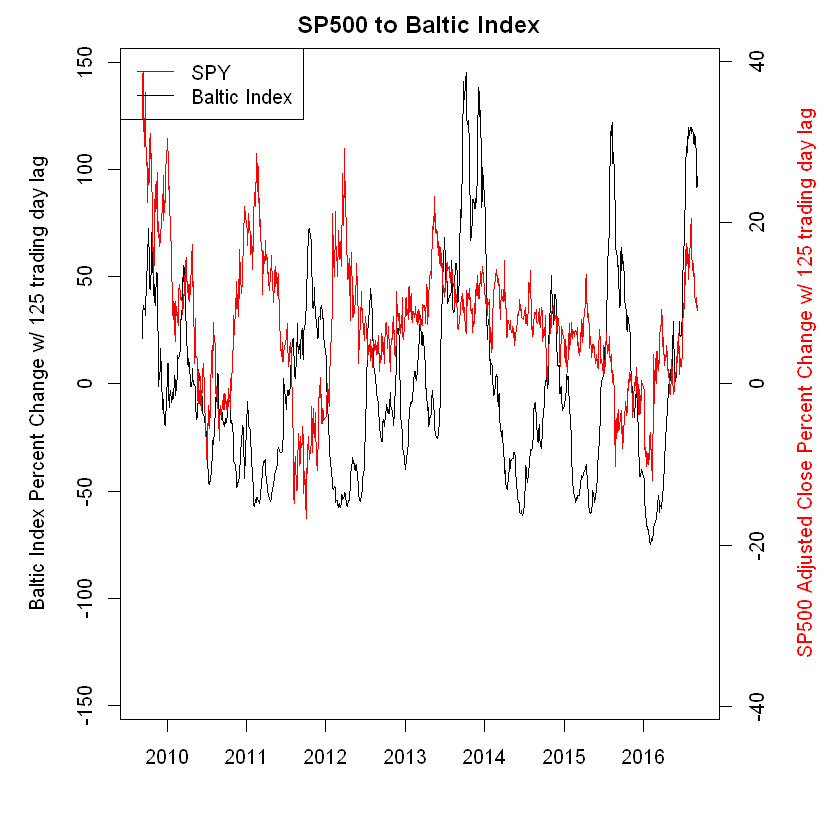

In [46]:
# Two axis Time Series
maxSPY <- max(abs(range(data$SPY,na.rm = T)))
maxBaltic <- max(abs(range(data$balticDry,na.rm = T)))

par(mar = c(5,5,2,5))
plot(data$balticDry, main = "SP500 to Baltic Index", type="l", col="black",
                xlab = NA, ylim = c(-maxBaltic, maxBaltic), ylab = paste0('Baltic Index Percent Change w/ ', lagDays," trading day lag"))
par(new = T)
plot(data$SPY, type = "l", col = 'red', ylim = c(-maxSPY, maxSPY), pch = 19, axes=F, xlab=NA, ylab=NA, cex=1.3)
axis(side = 4)
mtext(side = 4, line = 3, paste0('SP500 Adjusted Close Percent Change w/ ', lagDays," trading day lag"), col = 'red')
legend("topleft",
       legend=c("SPY", "Baltic Index"),
       lty=c(1,1), col=c("red3", "black"))


In [47]:
model <- lm(SPY_Adj ~ balticDry, data, na.action = na.omit)
summary(model)


Call:
lm(formula = SPY_Adj ~ balticDry, data = data, na.action = na.omit)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.0881  -4.6914   0.2313   4.7717  31.2123 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.331975   0.210163  34.887   <2e-16 ***
balticDry   0.001427   0.004562   0.313    0.754    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.414 on 1601 degrees of freedom
Multiple R-squared:  6.111e-05,	Adjusted R-squared:  -0.0005635 
F-statistic: 0.09784 on 1 and 1601 DF,  p-value: 0.7545


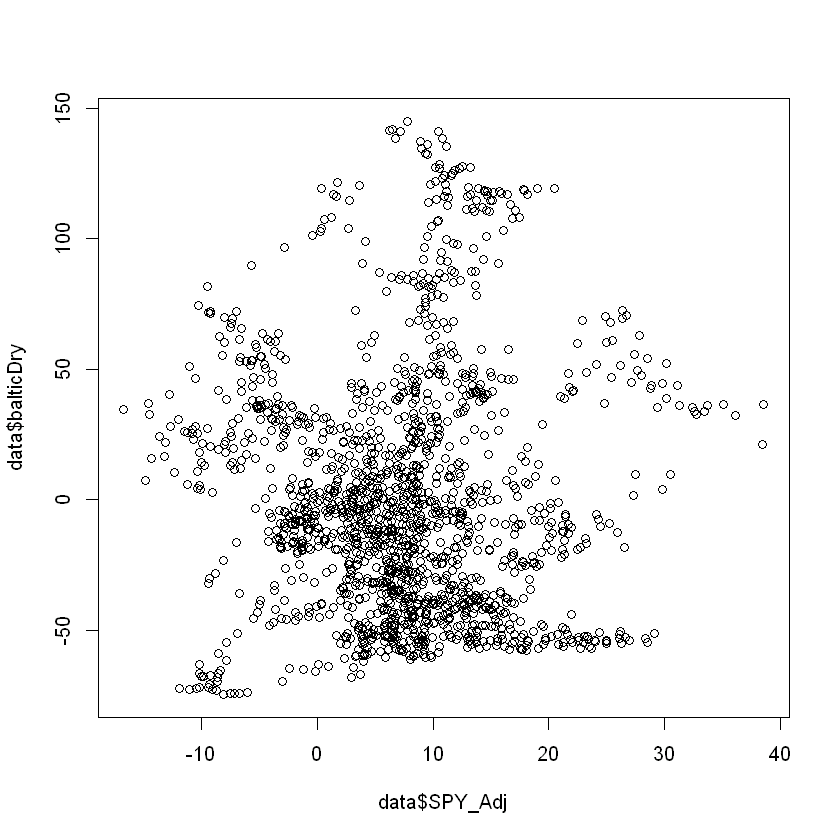

In [51]:
plot(data$SPY_Adj, data$balticDry)